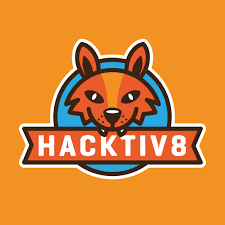

# Assgiment 3
Anugrah Aidin Yotolembah

PYTN -KS09-023

Python for Data Science - Studi Independen - kampus Merdeka

## Import Library

Langkah pertama untuk memulai membuat kode program pada kali ini, kita harus melakukan import library yang akan kita pakai

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

di atas merupakan library yang kita pakai berdasarkan arahan yang di minta

selanjutnya, kita akan import dataset yang akan kita pakai dalam program ini

# Import Dataset

Selanjutnya, kita akan memasukkan dataset kedalam program ini agar kita bisa membaca dan mengolah data yang berada di dalam dataset ini

In [146]:
bank_data = pd.read_csv('dataset/bank-full.csv', delimiter=';')
bank_data

print('dataset is ready now !!!')

dataset is ready now !!!


jika dataset berhasil di masukkan ke dalam program, selanjutnya kita akan mengexplore data yang berada di dalam dataset

## Exploratory Data 

langkah pertama menampilkan dan membacakan informasi 5 baris teratas di dalam dataset

In [147]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


bisa di lihat, setelah kita menampilkan informasi 5 baris teratas di dalam dataset, terdapat 5 besar informasi penting di dalamnya seperti data di atas

selanjutnya, menampilkan dan membacakan informasi dan 5 baris terbawah di dalam dataset

In [148]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


bisa di lihat, setelah kita menampilkan informasi 5 baris terbawah di dalam dataset, terdapat 5 besar informasi penting di dalamnya seperti data di atas

selanjutnya, mencari tau informasi tentang data type yang berada di dalam dataset yang kita gunakan

In [149]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


bisa di lihat data di atas, bahwa menurut informasi yang telah kita tampilkan terdapat 2 Dtype yang penting ialah Dtype int64 dan object, tetapi Dtype yang sering di pakai ialah tipe data object

selanjutnya, mencari tahu dan menampilkan informasi statistik dari data yang kita peroleh

In [150]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


bisa di lihat seperti data di atas yang telah kita peroleh informasinya, terdapat informasi mengenai count, mean, min, max dan lain sebagai yang sangat berguna 

selanjutnya, menampilkan dan mencari tau kolom apa saja yang terdapat di dalam dataset tersebut

In [151]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

bisa di lihat seperti data di atas, terdapat 17 kolom yang berada di dalam dataset ini

selanjutnya, mencari tahu jumlah baris dan kolom dari data

In [152]:
bank_data.shape

(45211, 17)

setelah kita mencari tahu jumlah baris dan kolom terhadap dataset ini, dapat di peroleh dalam dataset ini memiliki 45211 baris dan 17 kolom 

selanjutnya kita mencari tahu jumlah size yang terdapat dan terpakai pada dataset ini

In [153]:
bank_data.size

768587

setelah kita mencari tahu, terdapat 768587 size pada dataset ini  

# Cleaning Data 

langkah pertama, melihat kembali informasi 5 data teratas berdasarkan dataset   

In [154]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


bisa di lihat bahwa data berdasarkan dataset sudah tersedia

selanjutnya mengecek missing value  di dalam dataset ini yang bertujuan, jika terdapat missing value kita akan mencleaning data , dengan cara melihat kembali informasi dataset yang berada di dalam dataset ini

In [155]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


selanjutnya mengecek apakah dalam dataset ini terdapat missing value atau tidak terdapat missing value

In [156]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

setelah kita mengecek apakah terdapat missing value atau tidak di dalam dataset ini, ternyata di setiap kolom di dataset ini bernilai 0 yang berarti tidak terdapat missing value

## Pre-Processing Data

dalam melakukan Pre-Processing Data, pertama  menampilkan informasi data terlebih dahulu dan menvisualisasikan  kolom yang akan di visualisasikan

menampilkan informasi data terlebih dahulu, seperti menampilkan 5 informasi data teratas dan 5 informasi data terbawah berdasarkan dataset yang kita masukan ke dalam kode program

In [157]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


bisa di lihat bahwa informasi 5 data teratas berdasarkan dataset yang kita masukkan ke dalam kode program, terdapat berbagai informasi yang kita dapatkan, seperti informasi di kolom age, job, marital, education dan lain sebagainya

In [158]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


bisa di lihat bahwa informasi 5 data terbawah berdasarkan dataset yang kita masukkan ke dalam kode program, terdapat berbagai informasi yang kita dapatkan, seperti informasi di kolom age, job, marital, education dan lain sebagainya

selanjutnya kita bisa melihat informasi, tipe data apa saja yang di pakai di dalam dataset ini

In [159]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


berdasarkan informasi yang telah kita temukan, bahwa di setiap kolom range index dan total count itu sama, artinya tidak terdapat missing value, dan dalam informasi ini terdapat 2 tipe data yang di pakai, seperti tipe data int64 dan object

## Visualization Data 

ini masi bagian dari pre-processing data, selanjutnya ialah menvisualization data berdasarkan kolom yang kita inginkan, agar informasi lebih baik dan jelas. 

### Visualization Data by job columns

menvisualisasikan data berdasarkan pekerjaan yang akan berlangganan deposit

pertama, menampilkan kolom yang akan kita visualisasikan

In [160]:
bank_data[['job']]

,job
0,management
1,technician
2,entrepreneur
3,blue-collar
4,unknown
...,...
45206,technician
45207,retired
45208,retired
45209,blue-collar


bisa di lihat, terdapat banyak daftar pekerjaan di dalam kolom pekerjaan

selanjutnya, kita akan menvisualisasikan data berdasarkan kolom job

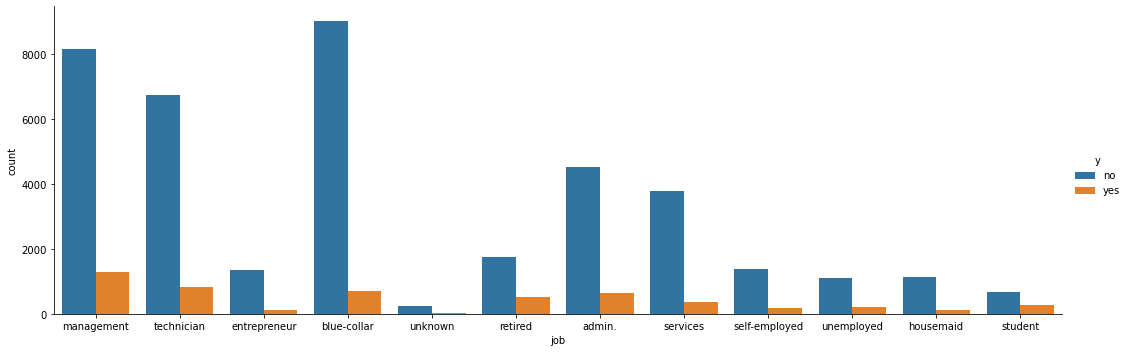

In [161]:
sns.catplot(x='job',hue='y',kind='count',data=bank_data, aspect=3, height=5)

berdasarkan data grafik visualisasi di atas bisa di lihat bahwa pekerjaan management paling banyak melakukan langganan dan membuka deposit di bank ini, dan pekerjaan blue-collar yang paling sedikit melakukan langaganan dan membuka deposit di bank ini

selanjutnya, kita akan melihat data grafik visualisasi jumlah langganan dan membuka deposit

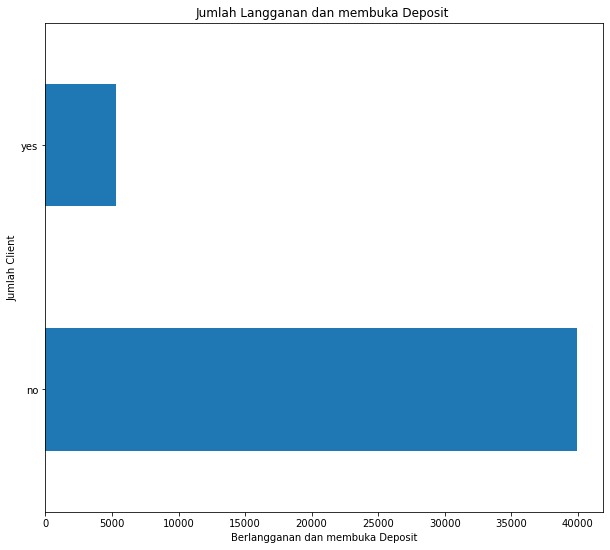

In [162]:
bank_data["y"].value_counts().plot(kind="barh", figsize=(10,9))
plt.xticks(rotation=0)
plt.title("Jumlah Langganan dan membuka Deposit ")
plt.ylabel("Jumlah Client") 
plt.xlabel("Berlangganan dan membuka Deposit")
plt.show()

berdasarkan visualisasi grafik di atas, bahwa banyak client yang menyatakan tidak untuk membuka dan berlangganan deposit di bank ini

## Conclutions :


berdasarkan data yang telah kita visualisasikan dapat di simpulkan bahwa :
1. pekerjaan management paling banyak membuka deposit ke dalam bank di bandingkan dengan pekerjaan lain
2. pekerjaan unknown paling sedikit dan menolak  membuka deposit ke dalam bank
3. jika dilihat secara keseluruhan, untuk tiap bidang pekerjaan, menolak untuk membuka deposit

## Visualization by education

selanjutnya menvisualisikan kolom education, agar banyak mendapatkan informasi tentang pendidikan apa saja yang membuka dan berlangganan deposit di bank ini dan apakah berhubungan dengan data grafik visualisasi pada kolom job

pertama, kita lihat dulu data dalam kolom education

In [163]:
ve = bank_data[['education']]
ve

,education
0,tertiary
1,secondary
2,secondary
3,unknown
4,unknown
...,...
45206,tertiary
45207,primary
45208,secondary
45209,secondary


bisa di lihat informasi di atas, terdapat banyak riwayat pendidikan yang membuka dan berlanganan deposit di bank ini

pertama melihat data grafik visualisasi pada kolom education tanpa di hubungkan dengan kolom job 

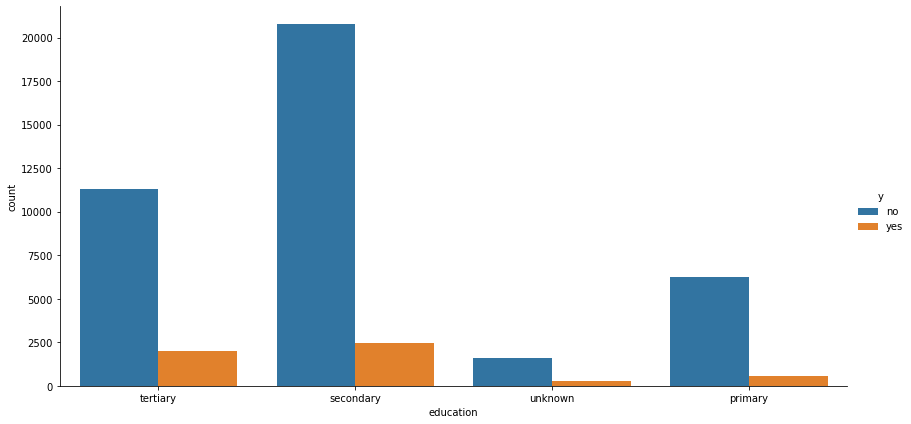

In [164]:
sns.catplot(x='education', hue='y', kind='count', data=bank_data, aspect= 2 , height = 6)

berdasarkan data grafik visualisasi di atas, memberikan informasi bahwa education paling banyak  yang berlanggan dan membuka deposit pada bank ini ialah tertiary education dan yang paling sedikit dan banyak memilih tidak melakukan langganan dan membuka deposit ialah secondary education

selanjutnya, membuat data grafik visualisasi yang menggabungkan antara educaiton dan job

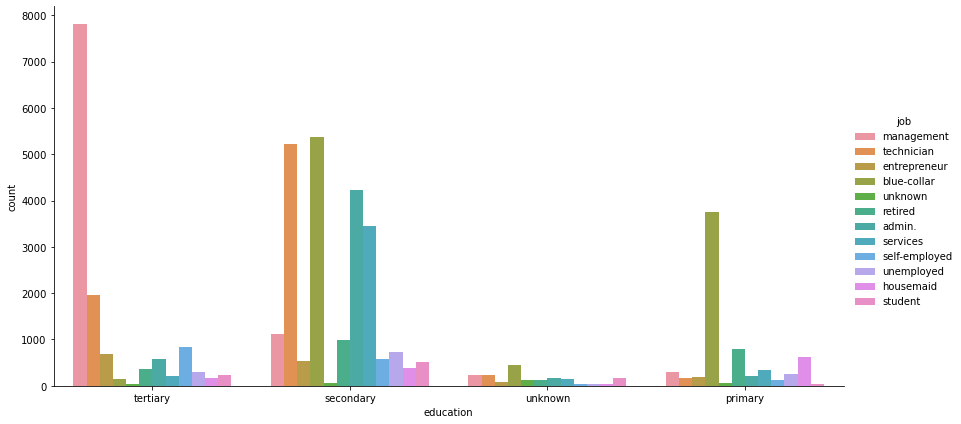

In [165]:
sns.catplot(x='education', hue='job', kind='count', data=bank_data, aspect=2, height=6)

berdasarkan data grafik visualisasi di atas setelah menggabungkan data grafik job dan education, bisa dilihat bahwa Kebanyakan dari client bank di tiap bidang pekerjaan telah menyelesaikan secondary education dan tertiary education

## Conclutions :
1. education paling banyak yang berlanggan dan membuka deposit pada bank ini ialah tertiary education dan yang paling sedikit dan banyak memilih tidak melakukan langganan dan membuka deposit ialah secondary education
2. setelah menggabungkan data grafik job dan education, bisa dilihat bahwa Kebanyakan dari client bank di tiap bidang pekerjaan telah menyelesaikan secondary education dan tertiary education

## Correlation
membuat korelasi  data antar kolom berdasarkan dataset

pertama kita akan membuat korelasi data antar kolom

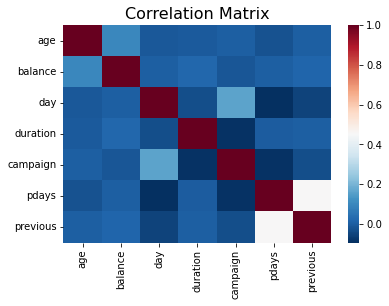

<Figure size 1440x1440 with 0 Axes>

In [166]:
cat_col_list = bank_data.columns[bank_data.dtypes == 'category'].to_list()
for col in cat_col_list:
    bank_data[col] = preprocessing.LabelEncoder().fit_transform(bank_data[col])

x = bank_data.iloc[:, 0:16]
y = bank_data.iloc[:, -1]

corrmat = bank_data.corr()
sns.heatmap(bank_data[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

## Conclutions

Dari hasil visualisasi heatmap di atas, kolom duration memiliki korelasi paling kuat terhadap y dibandingkan kolom lainnya.

## Modelling

sebelum kita melahkah ke classification modelling, pertama kita akan menghapus kolom yang tidak penting, agar saat menerapkan classification modelling lebih akurat 

pertama, menampilkan 5 data teratas berdasarkan informasi dalam dataset

In [167]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


selanjutnya menghapus kolom atau label yang tidak penting seperti contact, poutcome, default, mounth.

In [168]:
bank_data = bank_data.drop(columns=['contact', 'poutcome', 'default', 'month'])
bank_data.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,5,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,5,198,1,-1,0,no


bisa di lihat, bahwa kolom yang tidak penting sudah kita hapus

selanjutnya kita akan memodellingkan data

untuk memodellingkan data pertama kita harus membuat dan mencari  tahu encode data pada kolom ini tepatnya pada dataset ini agar kita bisa merubah dari data kategorik menjadi numerik

In [169]:
bank_data['y'] = encoder.fit_transform(bank_data['y'])
bank_data['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

berdasarkan hasil encode di atas kolom "y"sudah berubah tipe datanya menjadi numerik atau int

selanjutnya kita akan membuat variabel dan list yang berisi kolom yang masi tipe datanya kategorik, yang nantinya kita akan ubah ke kategorikal

In [170]:
X = bank_data[['age', 'balance', 'day', 'duration', 'campaign', 'job', 'marital']]
y = bank_data['y']

In [171]:
X = pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2143,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,2,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


bisa di lihat dari data di atas, bahwa variabel x sudah berubah tipe data menjadi numerik atau int

setelah kita merubah isi semua isi dataset menjadi numerik atau int, kita bisa langsung melakukan training pada data 

In [172]:
#split data menjadi 70% training dan 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

bisa di lihat untuk model data training di atas :
- X_train berguna untuk menampung nilai dan data source yang akan  ditraining

- y_train berguna untuk menampung nilai dan data source yang akan di training

- X_test berguna untuk menampung data target yang akan di training
- y__test berguna untuk menampung data target yang akan di training
- random state berguna untuk mengulang proses jalannya program yang hasilnya bisa random atau berubah rubah. 
- test_size berugna untuk ukuran data testing yang di latih, dan ukuran sebesar 30%

selanjutnya, kita akan melakukan me modelling data

## Logistic Regression

### Pre-processing data

pertama kita akan melakukan pre-processing data dan  memasukkan model logistic regression pada program kita

In [173]:
model = LogisticRegression()

#training model
model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


berdasarkan informasi di atas, bahwa model logistic regression yang akan di latih dan di prediksi berhasil di masukkan 

### Confusion Matriks
selanjutnya, melakukan Confusion_matrix yang berguna untuk mengetahui informasi data confusion matrix menggunakan y_test dan y_pred


In [174]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[11763   206]
 [ 1299   296]]


berdasarkan informasi di atas bahwa confusion matrix pada data ini menghasilkan nilai 11763 + 296 merupakan nilai untuk prediksi benar dan 1299 + 206 merupakan nilai untuk prediksi salah 

selanjutnya membuat visualisasi pada confusion matriks

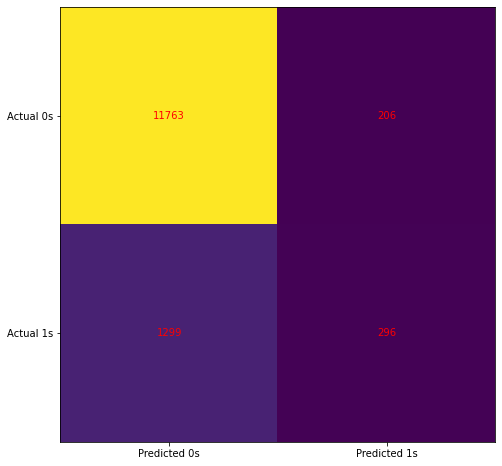

In [175]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

berdasarkan grafik di atas dapat di lihat : 

- terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11763 merupakan nilai prediksi negatif  benar dengan sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1299 merupakan nilai prediksi negatif benar sebagai 0 atau diprediksi dengan benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 206 merupakan nilai prediksi positif benar  dengan 0 sebagai salah di prediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 296 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes 

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [176]:
print(accuracy_score(y_test, y_pred))

0.8890445296372751


berdasarkan model di atas bahwa model di atas  dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari metode logistic regression sebesar 0.88 atau 88%

selanjutnya kita akan melakukan classifacation report 

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.59      0.19      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



bisa di lihat di atas terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions
berdasarkan data yang telah di olah dan di training di dapatkan kesimpulan sebagai berikut : 
1. confusion matrix pada data ini menghasilkan nilai 11763 + 206 merupakan nilai untuk prediksi benar dan 1299 + 296 merupakan nilai untuk prediksi salah

2. terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11763 merupakan nilai prediksi negatif  benar dengan sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1299 merupakan nilai prediksi negatif benar sebagai 0 atau diprediksi dengan benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 206 merupakan nilai prediksi positif benar  dengan 0 sebagai salah di prediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 296 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes 

3. di dapatkan accuracy score tau nilai akurasi terbaik dari metode logistic regression sebesar 0.88 atau 88%

4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi

## K-Nearst Neighbors

### Pre-Processing data

pertama kita akan melakukan pre processing data pada K-Nearst Neigbors pada program kita

In [178]:
#membuat model klasifikasi
KNN = KNeighborsClassifier()

#tmembuat raining model
KNN.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred1 = KNN.predict(X_test)

print('preprocessing successful')

preprocessing successful


jika tidak terdapat eror,  bisa di lihat bahwa pre-processing data berhasil di lakukan

###  Confusion Matriks
selanjutnya kita akan membuat confusion matriks pada model K-Nearst Neighbors 

In [179]:
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)

[[11567   402]
 [ 1264   331]]


bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 11567 + 331 merupakan nilai untuk prediksi benar dan 1264+ 402 merupakan nilai untuk prediksi salah

selanjutnya membuat visualisasi pada confusion matriks

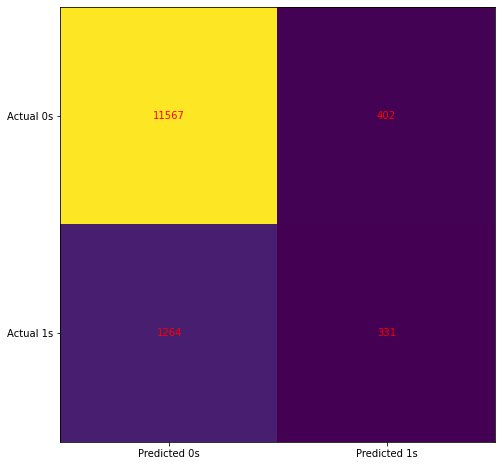

In [180]:
cm = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

berdasarkan grafik di atas dapat di lihat : 

- terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11567 merupakan nilai prediksi negatif  benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1264 merupakan nilai prediksi negatif salah dengan pengamat  sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 402 merupakan nilai prediksi positif salah  dengan pengamat sebagai 0 sebagai salah atau  diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 331 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes 

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [181]:
print(accuracy_score(y_test, y_pred1))

0.8771748746682395


berdasarkan model di atas bahwa model di atas  dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari K-Nearst Neighbors sebesar 0.87 atau 87%

selanjutnya kita akan melakukan classifacation report 

In [182]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11969
           1       0.45      0.21      0.28      1595

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



bisa di lihat di atas terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions
berdasarkan data yang telah di olah dan di training di dapatkan kesimpulan sebagai berikut :

1.  confusion matrix pada data ini menghasilkan nilai 11567 + 331 merupakan nilai untuk prediksi benar dan 1264+ 402 merupakan nilai untuk prediksi salah

2. erdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11567 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1264 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 402 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 331 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

3. pada model ini menghasilkan nilai accuracy score atau nilai akurasi terbaik dari K-Nearst Neighbors sebesar 0.87 atau 87%

4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

## Support Vector Machine (SVM)


### Pre-Processing Data

pertama kita akan melakukan pre processing data pada Support Vector Machine pada program kita

In [183]:
#menentukan model klasifikasi
svm_model = svm.SVC()

#training model
svm_model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred2 = svm_model.predict(X_test)

print('preprocessing successful')

preprocessing successful


jika tidak terdapat eror, bisa di lihat bahwa pre-processing data berhasil di lakukan

### Confusion Matriks
selanjutnya kita akan membuat confusion matriks pada model Support Vector Machine

In [184]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred2)
print(matrix)

[[11966     3]
 [ 1589     6]]


bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 11966 + 6 merupakan nilai untuk prediksi benar dan 1589 + 3 merupakan nilai untuk prediksi salah

selanjutnya membuat visualisasi pada confusion matriks

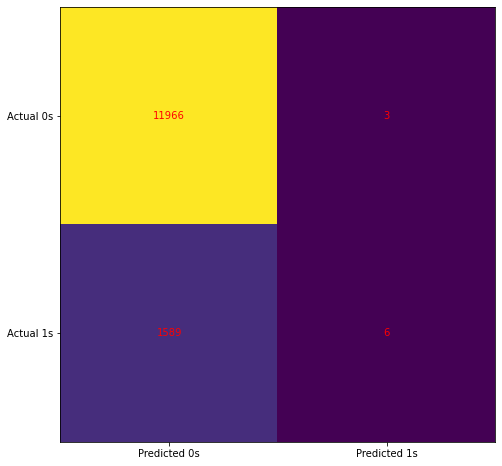

In [185]:
cm = confusion_matrix(y_test, y_pred2)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

berdasarkan grafik di atas dapat di lihat :

terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11966 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1589 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 3 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 6 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [186]:
print(accuracy_score(y_test, y_pred2))

0.8826304924800944


berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Support Vector Machine sebesar 0.88 atau 88%

selanjutnya kita akan melakukan classifacation report

In [187]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.67      0.00      0.01      1595

    accuracy                           0.88     13564
   macro avg       0.77      0.50      0.47     13564
weighted avg       0.86      0.88      0.83     13564



terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions
berdasarkan data yang telah di olah dan di training di dapatkan kesimpulan sebagai berikut :
1. bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 11966 + 6 merupakan nilai untuk prediksi benar dan 1589 + 3 merupakan nilai untuk prediksi salah

2. terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11966 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1589 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 3 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 6 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

3. berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Support Vector Machine sebesar 0.88 atau 88%

4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

## Decision Tree


### Pre-Processing Data
pertama kita akan melakukan pre processing data Decision Tree pada program kita

In [188]:
#menentukan model klasifikasi
dt = DecisionTreeClassifier()

#training model
dt.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred3 = dt.predict(X_test)

print('preprocessing successful')

preprocessing successful


jika tidak terdapat eror, bisa di lihat bahwa pre-processing data berhasil di lakukan

### Confusion Matriks
selanjutnya kita akan membuat confusion matriks pada Decision Tree

In [189]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred3)
print(matrix)

[[10800  1169]
 [ 1053   542]]


bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 10787 + 556 merupakan nilai untuk prediksi benar dan 1039 + 1182 merupakan nilai untuk prediksi salah

selanjutnya membuat visualisasi pada confusion matriks

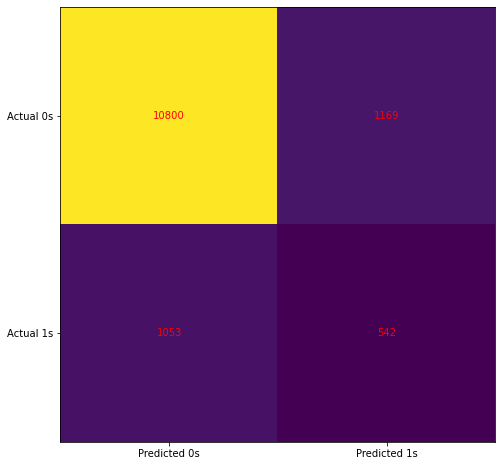

In [190]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

berdasarkan grafik di atas dapat di lihat :

terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 10787 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1039 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1182 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 556 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [191]:
print(accuracy_score(y_test, y_pred3))

0.8361840165143025


berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Decesion Tree sebesar 0.83 atau 83%

selanjutnya kita akan melakukan classifacation report

In [192]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11969
           1       0.32      0.34      0.33      1595

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions
berdasarkan data yang telah di olah dan di training di dapatkan kesimpulan sebagai berikut :

1. confusion matrix pada data ini menghasilkan nilai 10787 + 556 merupakan nilai untuk prediksi benar dan 1039 + 1182 merupakan nilai untuk prediksi salah

2. terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 10787 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1039 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1182 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 556 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

3. berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Decesion Tree sebesar 0.83 atau 83%

4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi
 

## Random Forest


### Pre-Processing Data 
pertama kita akan melakukan pre processing data Random Forest pada program kita

In [193]:
#menentukan model klasifikasi
rf = RandomForestClassifier()

#training model
rf.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred4 = rf.predict(X_test)

print('preprocessing successful')

preprocessing successful


jika tidak terdapat eror, bisa di lihat bahwa pre-processing data berhasil di lakukan

### Confusion Matriks
selanjutnya kita akan membuat confusion matriks pada Random Forest

In [194]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred4)
print(matrix)

[[11702   267]
 [ 1236   359]]


bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 11702 + 359 merupakan nilai untuk prediksi benar dan 1236 + 267 merupakan nilai untuk prediksi salah

selanjutnya membuat visualisasi pada confusion matriks

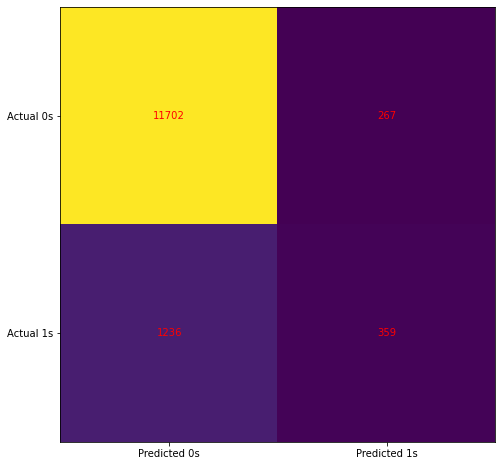

In [195]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred4)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

berdasarkan grafik di atas dapat di lihat :

terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11702 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1236 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 267 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 359 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [197]:
#melihat nilai accuracy

print(accuracy_score(y_test, y_pred4))

0.8891919787673253


berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Random Forest sebesar 0.88 atau 88%

selanjutnya kita akan melakukan classifacation report



In [198]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11969
           1       0.32      0.34      0.33      1595

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions 
1. bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 11702 + 359 merupakan nilai untuk prediksi benar dan 1236 + 267 merupakan nilai untuk prediksi salah

2. terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 11702 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1236 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 267 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 359 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

3. berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Random Forest sebesar 0.88 atau 88%

4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

## Naive Bayes

### Pre-Processing Data
pertama kita akan melakukan pre processing data Naive Bayes pada program kita

In [200]:
#menentukan model klasifikasi
nb = GaussianNB()

#training model
nb.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred5 = nb.predict(X_test)

print('preprocessing successful')

preprocessing successful


jika tidak terdapat eror, bisa di lihat bahwa pre-processing data berhasil di lakukan

### Confusion Matriks 
selanjutnya kita akan membuat confusion matriks pada Naive Bayes

In [201]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred5)
print(matrix)

[[10816  1153]
 [  951   644]]


bisa di lihat berdasarkan data di atas, bahwa confusion matrix pada data ini menghasilkan nilai 10816 + 644 merupakan nilai untuk prediksi benar dan 951 + 1153 merupakan nilai untuk prediksi salah

selanjutnya membuat visualisasi pada confusion matriks

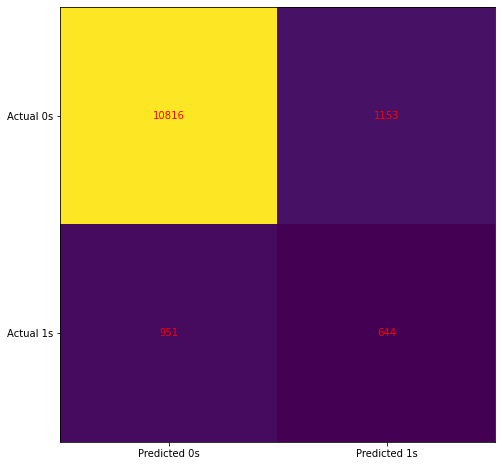

In [202]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred5)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

berdasarkan grafik di atas dapat di lihat :

terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 10816 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 951 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1153 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 644 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes

### Evaluasi Model
selanjutnya kita akan mengevalusi model training dan mencari tahu berapa accuracy score pada model ini

In [203]:
print(accuracy_score(y_test, y_pred5))

0.8448835151872603


berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Naive Bayes sebesar 0.84 atau 84%

selanjutnya kita akan melakukan classifacation report

In [204]:


print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11969
           1       0.36      0.40      0.38      1595

    accuracy                           0.84     13564
   macro avg       0.64      0.65      0.65     13564
weighted avg       0.85      0.84      0.85     13564



terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

### Conclusions :
1. confusion matrix pada data ini menghasilkan nilai 10816 + 644 merupakan nilai untuk prediksi benar dan 951 + 1153 merupakan nilai untuk prediksi salah
2. terdapat nilai pada confusion matrix pada visualisasi di atas yang bernilai 10816 merupakan nilai prediksi negatif benar dengan pengamat sebagai 0 atau prediksi benar

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 951 merupakan nilai prediksi negatif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi dengan sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 1153 merupakan nilai prediksi positif salah dengan pengamat sebagai 0 sebagai salah atau diprediksi sebagai 1 atau yes

- terdapat nilai pada confusion matrix pada visualisasi di atas bernilai 644 merupakan nilai prediksi positif benar yang di prediksi dengan benar sebagi 1 atau yes
3. berdasarkan model di atas bahwa model di atas dapat menghasilkan nilai accuracy score atau nilai akurasi terbaik dari Naive Bayes sebesar 0.84 atau 84%
4. terdapat classifacation report yang berguna untuk mengetahui semua laporan dan informasi pada model training yang telah kita buat tadi seperti terdapat informasi score precision, recall, f1-score dan support, dengan score yang bervariasi

## Algoritm Analysis 
dalam membuat Machine Learning terdapat banyak algoritma yang bisa di pakai.  dalam project atau assegment pada kali ini memakai 6 algoritma yang telah di tetapkan dan di terapkan pada kode program models yang telah kita buat . setelah di lakukan training test dan mencari accuracy score pada 6 alogritma tersebut saya membuat data frame yang berisi perbandingan tiap models algoritma  dan perbandingan accuracy score bisa di lihat seperti di bawah ini : 

In [215]:
pb = pd.DataFrame([{'Algoritm Models' : 'Logistic Regression', 'Accuracy Score' : '0.88904'},
                   {'Algoritm Models' : 'K-Nearst Neighbors', 'Accuracy Score' : '0.87717'},
                   {'Algoritm Models' : 'Support Vector Machine', 'Accuracy Score' : '0.88263'},
                   {'Algoritm Models' : 'Decision Tree', 'Accuracy Score' : '0.83618'},
                   {'Algoritm Models' : 'Random Forest', 'Accuracy Score' : '0.88919'},
                   {'Algoritm Models' : 'Naive Bayes', 'Accuracy Score' : '0.84488'}])
pb

,Algoritm Models,Accuracy Score
0,Logistic Regression,0.88904
1,K-Nearst Neighbors,0.87717
2,Support Vector Machine,0.88263
3,Decision Tree,0.83618
4,Random Forest,0.88919
5,Naive Bayes,0.84488


setelah membuat data frame dan membandingkan Accuracy Score dan Models Algoritma pada Machine Learning, maka  saya memilih model algoritma Random Forest di karnakan memiliki Accuracy Score yang paling tinggi di bandingkan dengan model algoritma lainnya.